In [102]:
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Dataset

In [32]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [33]:
X_train.shape

(60000, 28, 28)

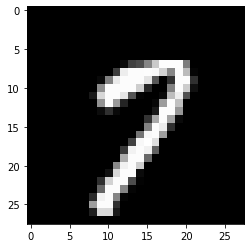

7


In [42]:
img_num = 9999

plt.imshow(X_train[img_num], cmap='gray')
plt.show()
print(y_train[img_num])

In [43]:
y_train.shape

(60000,)

### Preprocessing of X and y

In [44]:
image_rows = X_train[0].shape[0]
image_cols = X_train[0].shape[1]

print(image_rows, image_cols)

28 28


In [47]:
X_train.shape

(60000, 28, 28)

In [48]:
X_train_formatted = X_train.reshape(X_train.shape[0], image_rows*image_cols)
X_test_formatted = X_test.reshape(X_test.shape[0], image_rows*image_cols)

In [50]:
X_train_formatted.shape

(60000, 784)

In [51]:
X_test_formatted.shape

(10000, 784)

In [54]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [55]:
from sklearn.preprocessing import LabelBinarizer
label_maker = LabelBinarizer()

In [59]:
y_train_formatted = label_maker.fit_transform(y_train)
y_test_formatted = label_maker.transform(y_test)

In [60]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [62]:
y_train_formatted[:5]

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [67]:
label_maker.inverse_transform(np.array([[0,0,0,0,0,0,0,0,0,1]]))

array([9], dtype=uint8)

### Defining the model

In [68]:
model = Sequential()

model.add(Dense(units=100, activation='relu', input_dim=image_rows*image_cols))
model.add(Dense(units=10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Model Training

In [70]:
model_info = model.fit(X_train_formatted, y_train_formatted, epochs=15, batch_size=128, validation_split=0.2, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
 - 3s - loss: 5.7660 - accuracy: 0.8363 - val_loss: 1.3159 - val_accuracy: 0.8827
Epoch 2/15
 - 2s - loss: 0.7835 - accuracy: 0.8892 - val_loss: 0.6562 - val_accuracy: 0.8932
Epoch 3/15
 - 3s - loss: 0.4273 - accuracy: 0.9143 - val_loss: 0.4832 - val_accuracy: 0.9103
Epoch 4/15
 - 3s - loss: 0.3073 - accuracy: 0.9301 - val_loss: 0.4509 - val_accuracy: 0.9210
Epoch 5/15
 - 2s - loss: 0.2380 - accuracy: 0.9413 - val_loss: 0.4249 - val_accuracy: 0.9326
Epoch 6/15
 - 3s - loss: 0.2029 - accuracy: 0.9506 - val_loss: 0.3909 - val_accuracy: 0.9366
Epoch 7/15
 - 3s - loss: 0.1708 - accuracy: 0.9548 - val_loss: 0.3653 - val_accuracy: 0.9401
Epoch 8/15
 - 2s - loss: 0.1602 - accuracy: 0.9580 - val_loss: 0.3470 - val_accuracy: 0.9408
Epoch 9/15
 - 2s - loss: 0.1447 - accuracy: 0.9607 - val_loss: 0.3686 - val_accuracy: 0.9392
Epoch 10/15
 - 2s - loss: 0.1337 - accuracy: 0.9625 - val_loss: 0.3559 - val_accuracy: 0.9456
Epoch 11/15
 - 2s -

In [73]:
model_info.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

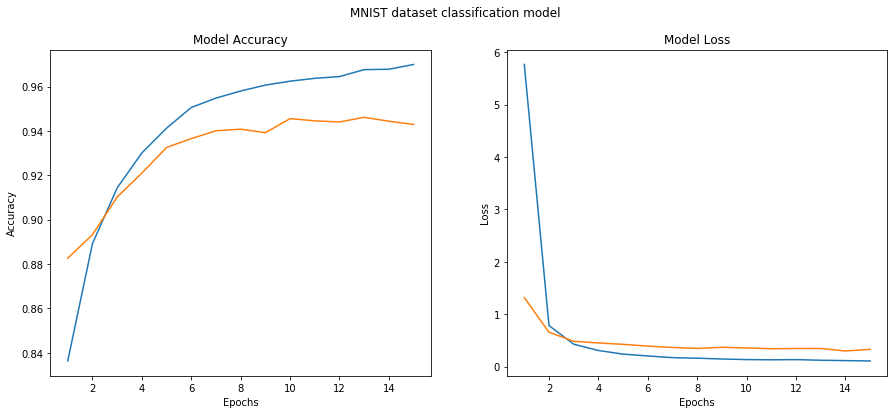

In [74]:
plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
plt.title('Model Accuracy')
plt.plot(np.arange(1, 16), model_info.history['accuracy'], label='Training Data')
plt.plot(np.arange(1, 16), model_info.history['val_accuracy'], label='Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.title('Model Loss')
plt.plot(np.arange(1, 16), model_info.history['loss'], label='Training Data')
plt.plot(np.arange(1, 16), model_info.history['val_loss'], label='Validation Data')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.suptitle('MNIST dataset classification model')
plt.show()

### Evaluating the model

In [93]:
y_pred = model.predict(X_test_formatted)

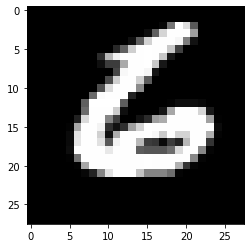

In [85]:
plt.imshow(X_test[-1], cmap='gray')

In [86]:
y_test[-1]

6

In [87]:
y_test_formatted[-1]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [94]:
y_pred[-1]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [95]:
y_pred = label_maker.inverse_transform(y_pred)

In [96]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [97]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [98]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

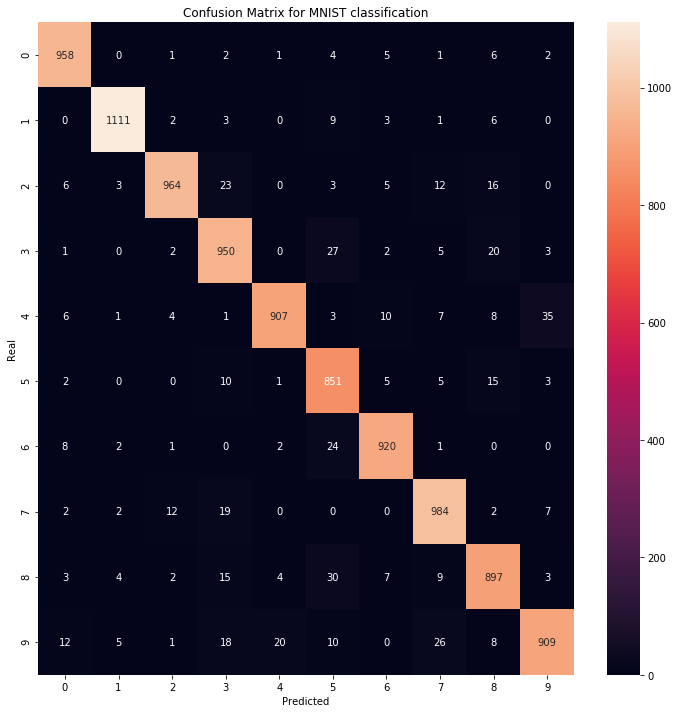

This ANN model has an accuracy of 94.51%


In [104]:
plt.figure(figsize=(12, 12))

sns.heatmap(cm, annot=True, fmt='d')
# plt.xticks(labels=label_maker.classes_)
# plt.yticks(labels=label_maker.classes_)
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion Matrix for MNIST classification')
plt.show()

print('This ANN model has an accuracy of {}%'.format(round(accuracy*100, 2)))

In [106]:
results = pd.DataFrame(columns=['Real', 'Predicted'])
results['Real'] = y_test
results['Predicted'] = y_pred

results.head()

,Real,Predicted
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [119]:
error_images = results[(results.Real==9) | (results.Predicted==0)].index

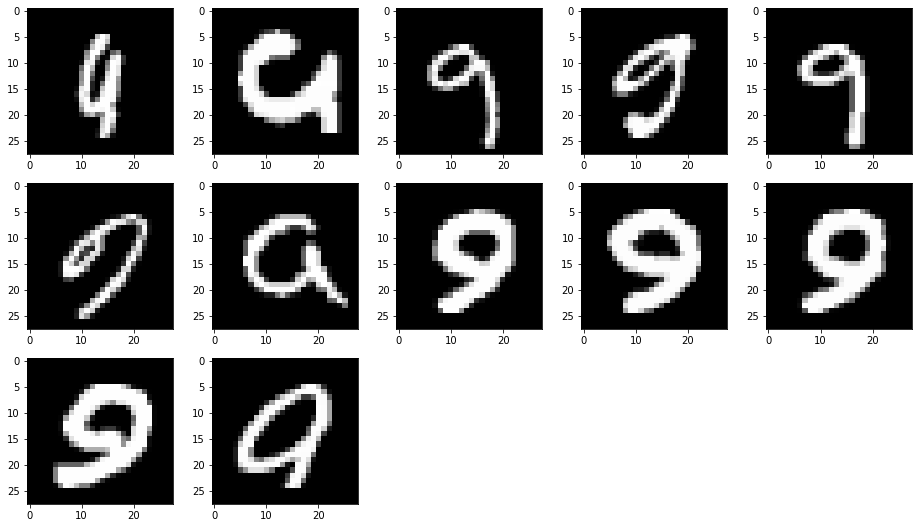

In [120]:
plt.figure(figsize=(16, 22))
for i in range(len(error_images)):
    plt.subplot(7, 5, i+1)
    plt.imshow(X_test[error_images[i]], cmap='gray')
    

In [122]:
results[(results.Real==9) | (results.Predicted==0)]

,Real,Predicted
3,0,0
7,9,9
9,9,9
10,0,0
12,9,9
...,...,...
9964,0,0
9973,9,9
9983,0,0
9992,9,9
